<a href="https://colab.research.google.com/github/dydyandra/kecerdasan-komputasional/blob/master/California_Housing_Clustering_05111940000119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas California Housing Clustering
Nama: Dyandra Paramitha Widyadhana<br>
NRP: 05111940000119<br>
Kelas: KK F

# Membaca Dataset
Link Dataset: [California House Prices](https://www.kaggle.com/camnugent/california-housing-prices)

1.	Sebelum melakukan clustering, yang pertama harus dilakukan yaitu melakukan import library yang dibutuhkan. Ada beberapa library yang dibutuhkan seperti pandas, numpy, matplotlib, seaborn, KMeans dan datasets (yang berasal dari Machine Learning Library scikit-learn). 

In [1]:
# importing libraries used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

2.	Setelah library berhasil diimport, kemudian kita harus membaca file housing.csv untuk mendapatkan dataset yang kita butuhkan untuk clustering. Dalam membaca file, dapat digunakan library pandas yaitu read_csv. 
Setelah file berhasil dibaca, kita dapat melihat isi dan summary dari dataset menggunakan df.head() untuk menampilkan 5 data pertama.


In [2]:
# reading the data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Dapat dilihat beberapa isi dari dataset, yang terdiri atas longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity. 

Dapat dilihat juga bahwa semua kolom memiliki tipe data numerical, kecuali ocean_proximity yang merupakan categorical data. 


# Data Preprocessing

3.	Untuk melihat summary, kita dapat menggunakan df.info(), yang akan menampilkan beberapa hal seperti tipe, rentang index, isi kolom dataset dengan jumlah dan jenis masing-masing fitur. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


4.	Dengan menggunakan df.isnull().sum() yang akan mengembalikan jumlah data yang hilang dari dataset. Tujuan kita adalah untuk melihat apakah atribut yang dibutuhkan memiliki data yang lengkap atau tidak. Data yang hilang dapat berdampak besar pada model yang dibuat dikarenakan dapat mengurasi keakurasian dari data. 


In [4]:
# finding missing data
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dapat dilihat bahwa terdapat 20640 data dalam dataset. Terlihat juga bahwa terdapat missing value pada total_bedrooms sebanyak 207 data. Akan tetapi, dikarenakan fitur yang digunakan yaitu longitude dan latitude, maka missing value pada total_bedrooms tidak akan mempengaruhi banyak terhadap clustering yang akan dilakukan. 

# Feature Selection

5.	Setelah melakukan data preprocessing, kemudian kita bisa memilih feature selection untuk digunakan dalam model Clustering kita. Feature selection digunakan untuk mengambil data-data yang dibutuhkan dan bertujuan untuk memilih feature yang berpengaruh dan mengesampingkan feature yang tidak berpengaruh dalam suatu kegiatan pemodelan atau penganalisaan data. 

> Dikarenakan yang diminta yaitu longitude dan latitude, kita dapat mengambil 2 kolom pertama dari dataframe. Untuk ini, kita bisa menggunakan df.iloc[:, [0,1]] , untuk mendapat baris (atau kolom) pada posisi tertentu dalam indeks.  Adapun kita membuat DataFrame baru yang bernama feature_df.







In [5]:
#feature selection (longitude, latitude)
feature_df = df.iloc[:, [0,1]] 

In [6]:
feature_df

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


6.	Dari data sebelum dilakukan pemodelan, dilihat terlebih dahulu apakah terdapat data yang harus dinormalisasi atau tidak. Normalisasi data adalah proses membuat beberapa variabel memiliki rentang nilai yang sama apabila rentang pada data asli terlalu jauh, untuk memudahkan analisis statistic dan pemodelan data nantinya. 



In [7]:
feature_df.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


Akan tetapi, dapat dilihat bahwa rentang nilai dari longitude [-119.6, -114.3] dan latitude [35,6, 42] tidak terlalu besar. Dapat juga dilihat dari standar deviasinya yang tidak terlalu besar, sehingga data tidak perlu dinormalisasi kembali. 

7.	Setelah itu, DataFrame feature_df agar dapat dilakukan pemodelan harus diubah menjadi array. Untuk melakukan ini, dapat menggunakan library numpy, yaitu np.array, yang akan mengkonversikan yang sebelumnya bertipe DataFrame menjadi array 2D. 

In [8]:
x  = np.array(feature_df)
x

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

# Clustering

## Menentukan Jumlah Cluster dengan Elbow Method

8.	Sebelum melakukan clustering, kita harus menentukan terlebih dahulu jumlah cluster yang ingin digunakan. Untuk menentukan jumlah cluster, kita dapat menggunakan Elbow Method, dimana cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Suatu siku ini menandakan cluster mana yang paling optimal untuk digunakan. 

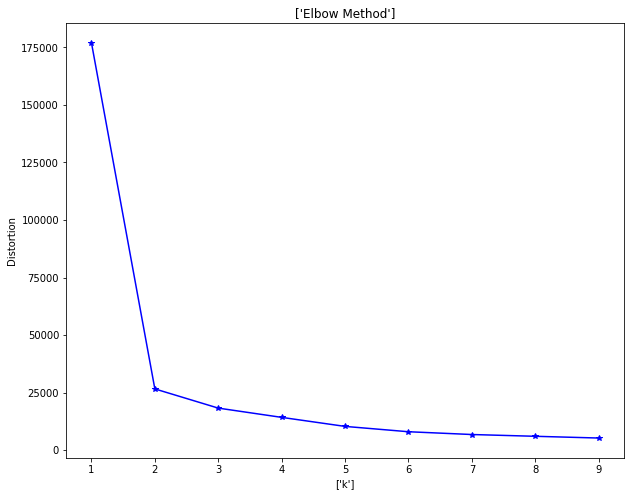

In [9]:
# Collecting the distortions into list
distortions = []

K = range(1,10)
for k in K:
 kmean_Model = KMeans(n_clusters=k)
 kmean_Model.fit(x)
 distortions.append(kmean_Model.inertia_)

# Plotting the distortions
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'b*-')
plt.xlabel(['k'])
plt.ylabel('Distortion')
plt.title(['Elbow Method'])
plt.show()


Dari elbow method, terlihat bahwa jumlah optimal cluster yaitu di antara 2 dan 3. 

9.	Selain dengan melihat perbandingan visualisasi Distortion juga dapat menggunakan Silhouette Method menggunakan SSE (Sum of Squared Error) 

In [10]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 3425,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [11]:
pip install kneed

In [12]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 10), sse, curve="convex", direction="decreasing"
)

kl.elbow

2

Dengan menggunakan package Kneed dan library KneeLocator, kita juga dapat menentukan jumlah cluster. Dengan menggunakan hasil SSE yang didapatkan, terlihat bahwa jumlah cluster yang optimal yaitu 2. 

## Menentukan Jumlah Cluster dengan Silhouette Method

10.	Salah satu cara lain untuk menentukan jumlah cluster yaitu dengan menggunakan Silhouette Method. Pada percobaan Silhouette Method ini, akan dicoba untuk memvisualisasi apabila terdapat 4 tipe cluster yaitu k = 2, k = 3, k = 4, atau k = 5. 

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples 


km = KMeans(n_clusters=3, random_state=42)

km.fit_predict(x)

score = silhouette_score(x, km.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.647


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


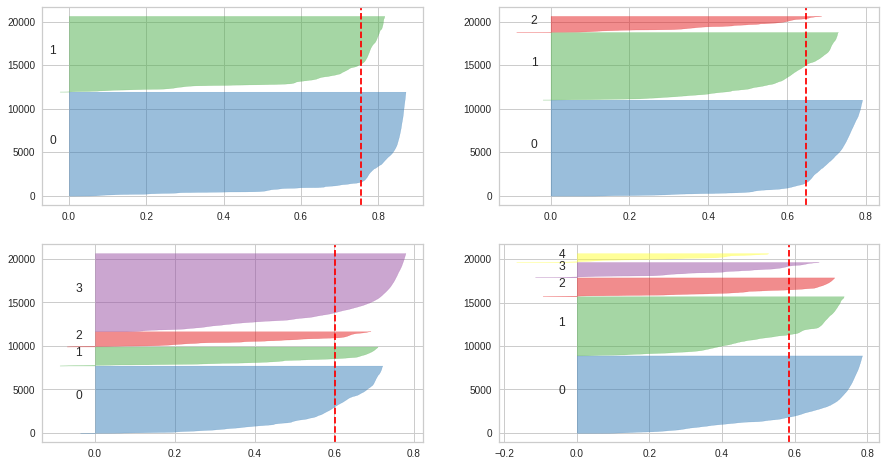

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, 
                      verbose=0, random_state=3425)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

Dapat dilihat untuk Silhouette Method bahwa pembagian data yang lebih uniform dan atau rata yaitu pada saat kluster berjumlah 2, sehingga sesuai dengan jumlah kluster yang didapatkan di Elbow Method. 

## Clustering Menggunakan K-Means

11.	Setelah selesai menentukan jumlah cluster, kita dapat membuat model menggunakan K-Means. Adapun kemudian dapat dilakukan prediksi untuk dataset yang kita miliki. 

In [15]:
# Define the model
number_of_k = 2
kmeans_model = KMeans(n_clusters=number_of_k, init='k-means++', max_iter=100, 
                      verbose=0, random_state=3425)
# Fit into our dataset fit
y_kmeans = kmeans_model.fit_predict(x)

12.	Menambahkan kolom baru pada DataFrame awal untuk hasil prediksi yang didapatkan. Pada gambar di bawah terdapat sampling random dari isi DataFrame sekarang. 

In [16]:
df['Cluster'] = y_kmeans
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Cluster
11353,-117.92,33.75,32.0,790.0,199.0,1196.0,201.0,3.0625,142800.0,<1H OCEAN,0
9935,-122.30,38.27,4.0,1051.0,263.0,455.0,248.0,3.6389,130200.0,NEAR BAY,1
4465,-118.19,34.07,38.0,2965.0,665.0,2128.0,650.0,3.0241,166300.0,<1H OCEAN,0
2283,-119.76,36.79,26.0,3654.0,837.0,1976.0,830.0,2.1544,72800.0,INLAND,1
2852,-118.96,35.38,41.0,2417.0,435.0,973.0,406.0,3.0568,85600.0,INLAND,0
9951,-122.40,38.41,20.0,4867.0,1015.0,1725.0,1015.0,2.5685,267600.0,INLAND,1
12989,-121.26,38.68,4.0,3080.0,827.0,1195.0,683.0,2.7477,133000.0,INLAND,1
7229,-118.16,34.02,44.0,1218.0,374.0,1175.0,342.0,1.9688,173900.0,<1H OCEAN,0
1000,-121.76,37.69,29.0,3433.0,711.0,1919.0,709.0,3.3841,184400.0,INLAND,1
6180,-117.92,34.08,35.0,1860.0,323.0,1011.0,305.0,3.5536,207000.0,<1H OCEAN,0


# Visualisasi Data Clustering

13.	Setelah mendapatkan hasil clustering, kita dapat melakukan visualisasi untuk melihat lebih jelas bagaimana hasil clustering yang didapatkan. Untuk visualisasi data kita dapat memanfaatkan library matplotlib untuk membuat Scatter Plot. 

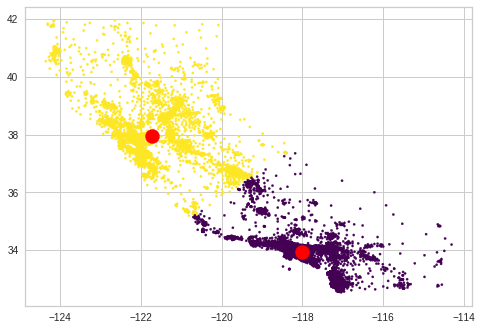

In [17]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);

Text(0, 0.5, 'latitude')

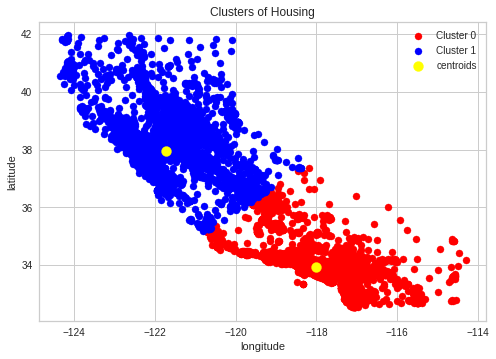

In [18]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Cluster 1')

# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'centroids')
plt.legend()

plt.title('Clusters of Housing')
plt.xlabel('longitude')
plt.ylabel('latitude')